In [196]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from sympy import symbols, sqrt, Eq
plt.rcParams['figure.figsize'] = [6,6]

# Solidly Analysis (Freeze01)

## Equations

### Invariant function

The Solidly invariant function is 

$$
    x^3y+xy^3 = k
$$

which is a stable swap curve, but more convex than say curve. 

In [197]:
def invariant_eq(x,y,k=0):
    return x**3 * y + x * y**3 - k

### Swap equation

Solving the invariance equation as $y=y(x; k)$ gives the following result

$$
y(x;k) = \frac{x^2}{\left(-\frac{27k}{2x} + \sqrt{\frac{729k^2}{x^2} + 108x^6}\right)^{\frac{1}{3}}} - \frac{\left(-\frac{27k}{2x} + \sqrt{\frac{729k^2}{x^2} + 108x^6}\right)^{\frac{1}{3}}}{3}
$$

We can introduce intermediary variables $L(x;k), M(x;k)$ to write this a bit more simply

$$
L = -\frac{27k}{2x} + \sqrt{\frac{729k^2}{x^2} + 108x^6}
$$

$$
M = L^{1/3} = \sqrt[3]{L}
$$

$$
y = \frac{x^2}{\sqrt[3]{L}} - \frac{\sqrt[3]{L}}{3} = \frac{x^2}{M} - \frac{M}{3} 
$$

Using the function $y(x;k)$ we can easily derive the swap equation at point $(x; k)$ as

$$
\Delta y = y(x+\Delta x; k) - y(x; k)
$$

In [198]:
x, k = symbols('x k')

y = x**2 / ((-27*k/(2*x) + sqrt(729*k**2/x**2 + 108*x**6)/2)**(1/3)) - (-27*k/(2*x) + sqrt(729*k**2/x**2 + 108*x**6)/2)**(1/3)/3
y

x**2/(-27*k/(2*x) + sqrt(729*k**2/x**2 + 108*x**6)/2)**0.333333333333333 - (-27*k/(2*x) + sqrt(729*k**2/x**2 + 108*x**6)/2)**0.333333333333333/3

In [199]:
L = -27*k/(2*x) + sqrt(729*k**2/x**2 + 108*x**6)/2
y2 = x**2 / (L**(1/3)) - (L**(1/3))/3
y2

x**2/(-27*k/(2*x) + sqrt(729*k**2/x**2 + 108*x**6)/2)**0.333333333333333 - (-27*k/(2*x) + sqrt(729*k**2/x**2 + 108*x**6)/2)**0.333333333333333/3

Note that as above, $L$ (that we call $L_1$ now) is not particularly well conditioned. 

$$
L_1 = -\frac{27k}{2x} + \sqrt{\frac{729k^2}{x^2} + 108x^6}
$$

This alternative form works better

$$
L_2(x;k) = \frac{27k}{2x} \left(\sqrt{1 + \frac{108x^8}{729k^2}} - 1 \right)
$$

Furthermore

$$
\sqrt{1+\xi}-1 = \frac{\xi}{2} - \frac{\xi^2}{8} + \frac{\xi^3}{16} - \frac{5\xi^4}{128} + O(\xi^5)
$$

In [238]:
def L1(x,k):
    return -27*k/(2*x) + sqrt(729*k**2/x**2 + 108*x**6)/2

def L2(x,k):
    xi = (108 * x**8) / (729 * k**2)
    lam1 = (m.sqrt(1 + xi) - 1)
    lam2 = xi/2 - xi**2/8 
    #lam2 = xi/2 - xi**2/8 + xi**3/16 - 0.0390625*xi**4
    #lam2 = xi*(1/2 - xi*(1/8 - xi*(1/16 - 0.0390625*xi)))
    lam = max(lam1, lam2)
        # for very small xi we can get zero or close to zero in the full formula
        # in this case the taulor approximation is better because for small xi it is always > 0
        # we simply use the max of the two -- the Taylor gets negative quickly
    L = lam * (27 * k) / (2 * x)
    return L

In [201]:
L1(0.1, 1), L2(0.1,1)

(9.99999940631824e-8, 9.9999999962963e-08)

In [202]:
M = L**(1/3)
y3 = x**2 / M - M/3
y3

x**2/(-27*k/(2*x) + sqrt(729*k**2/x**2 + 108*x**6)/2)**0.333333333333333 - (-27*k/(2*x) + sqrt(729*k**2/x**2 + 108*x**6)/2)**0.333333333333333/3

In [203]:
assert y  == y2
assert y  == y3
assert y2 == y3

In [204]:
def swap_eq(x,k):
    L,M,y = [None]*3
    try:
        #L = -27*k/(2*x) + m.sqrt(729*k**2/x**2 + 108*x**6)/2
        L = L2(x,k)
        M = L**(1/3)
        y = x**2/M - M/3
    except Exception as e:
        print("Exception: ", e)
        print(f"x={x}, k={k}, L={L}, M={M}, y={y}")
    return y

In [205]:
def swap_eq2(x, k):
    # Calculating the components of the swap equation
    term1_numerator = (2/3)**(1/3) * x**3
    term1_denominator = (9 * k * x**2 + m.sqrt(3) * m.sqrt(27 * k**2 * x**4 + 4 * x**12))**(1/3)

    term2_numerator = (9 * k * x**2 + m.sqrt(3) * m.sqrt(27 * k**2 * x**4 + 4 * x**12))**(1/3)
    term2_denominator = 2**(1/3) * 3**(2/3) * x

    # Swap equation calculation
    y = -term1_numerator / term1_denominator + term2_numerator / term2_denominator

    return y

# Example usage
x_value = 1  # Replace with the desired value of x
k_value = 1  # Replace with the desired value of k
print(swap_eq(x_value, k_value))

0.6823278038280196


### Price equation

The derivative $p=dy/dx$ is as follows

$$
p=\frac{dy}{dx} = 6^{\frac{1}{3}}\left(\frac{-2 \cdot 3^{\frac{1}{3}} \cdot x \cdot \sqrt{\frac{27k^2 + 4x^8}{x^2}} \cdot \left(-9k + \sqrt{3} \cdot x \cdot \sqrt{\frac{27k^2 + 4x^8}{x^2}}\right) \cdot \left(3k \cdot x \cdot \sqrt{\frac{27k^2 + 4x^8}{x^2}} + \sqrt{3} \cdot \left(-9k^2 + 4x^8\right)\right) + 2^{\frac{1}{3}} \cdot \sqrt{\frac{27k^2 + 4x^8}{x^2}} \cdot \left(\frac{-9k + \sqrt{3} \cdot x \cdot \sqrt{\frac{27k^2 + 4x^8}{x^2}}}{x}\right)^{\frac{5}{3}} \cdot \left(-3k \cdot x \cdot \sqrt{\frac{27k^2 + 4x^8}{x^2}} + \sqrt{3} \cdot \left(9k^2 - 4x^8\right)\right) + 4 \cdot 3^{\frac{1}{3}} \cdot \left(-9k + \sqrt{3} \cdot x \cdot \sqrt{\frac{27k^2 + 4x^8}{x^2}}\right)^2 \cdot \left(27k^2 + 4x^8\right)}{6 \cdot x \cdot \left(\frac{-9k + \sqrt{3} \cdot x \cdot \sqrt{\frac{27k^2 + 4x^8}{x^2}}}{x}\right)^{\frac{7}{3}} \cdot \left(27k^2 + 4x^8\right)}\right)
$$



In [206]:
def price_eq(x, k):
    # Components of the derivative
    term1_numerator = 2**(1/3) * x**3 * (18 * k * x + (m.sqrt(3) * (108 * k**2 * x**3 + 48 * x**11)) / (2 * m.sqrt(27 * k**2 * x**4 + 4 * x**12)))
    term1_denominator = 3 * (9 * k * x**2 + m.sqrt(3) * m.sqrt(27 * k**2 * x**4 + 4 * x**12))**(4/3)
    
    term2_numerator = 18 * k * x + (m.sqrt(3) * (108 * k**2 * x**3 + 48 * x**11)) / (2 * m.sqrt(27 * k**2 * x**4 + 4 * x**12))
    term2_denominator = 3 * 2**(1/3) * 3**(2/3) * x * (9 * k * x**2 + m.sqrt(3) * m.sqrt(27 * k**2 * x**4 + 4 * x**12))**(2/3)
    
    term3 = -3 * 2**(1/3) * x**2 / (9 * k * x**2 + m.sqrt(3) * m.sqrt(27 * k**2 * x**4 + 4 * x**12))**(1/3)
    
    term4 = -(9 * k * x**2 + m.sqrt(3) * m.sqrt(27 * k**2 * x**4 + 4 * x**12))**(1/3) / (2**(1/3) * 3**(2/3) * x**2)
    
    # Combining all terms
    dy_dx = (term1_numerator / term1_denominator) + (term2_numerator / term2_denominator) + term3 + term4

    return dy_dx

# Example usage
x_value = 1  # Replace with the desired value of x
k_value = 1  # Replace with the desired value of k
print(price_eq(x_value, k_value))


-1.3136251299197979


#### Inverting the price equation

The above equations 
([obtained thanks to Wolfram Alpha](https://chat.openai.com/share/55151f92-411c-43c1-a6ec-180856762a82), 
the interface of which still sucks) are rather complex, and unfortunately they can't apparently be inverted analytically to get $x=x(p;k)$

## Charts

### Invariant equation

In [207]:
y_f = swap_eq

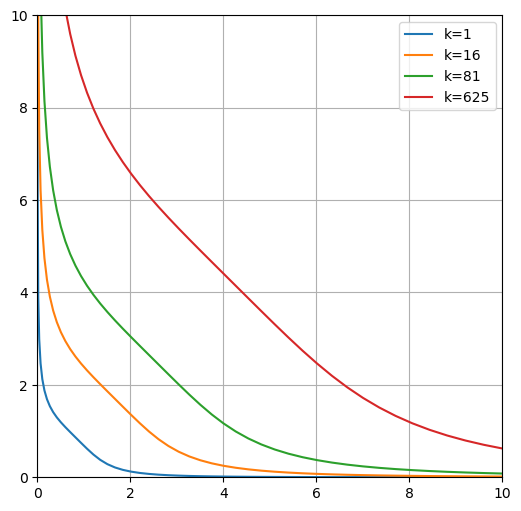

In [208]:
k_v = [1**4, 2**4, 3**4, 5**4]
#k_v = [1**4]
x_v = np.linspace(0, m.sqrt(10), 50)
x_v = [xx**2 for xx in x_v]
x_v[0] = x_v[1]/2
y_v_dct = {kk: [y_f(xx, kk) for xx in x_v] for kk in k_v}
plt.grid(True)
for kk, y_v in y_v_dct.items(): 
    plt.plot(x_v, y_v, marker=None, linestyle='-', label=f"k={kk}")
plt.legend()
plt.xlim(0, max(x_v))
plt.ylim(0, max(x_v))
plt.show()

In [209]:
kk = 10
xx = 2
invariant_eq(x=xx, y=swap_eq(xx, kk), k=kk)

7.105427357601002e-15

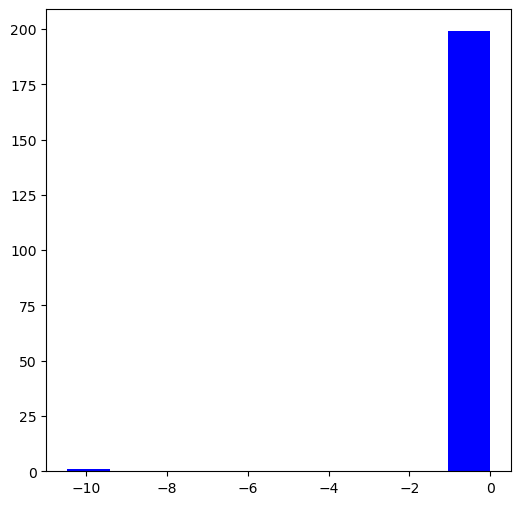

In [210]:
y_inv_dct = {kk: [invariant_eq(x=xx, y=swap_eq(xx, kk), k=kk) for xx in x_v] for kk in k_v}
y_inv_lst = [v for lst in y_inv_dct.values() for v in lst]
#y_inv_lst
plt.hist(y_inv_lst, bins=10, color="blue")
plt.show()

In [211]:
{k: max([abs(vv) for vv in v]) for k,v in y_inv_dct.items()}

{1: 0.0102200306584036,
 16: 0.007342191625435035,
 81: 0.9182468262089287,
 625: 10.463713766637625}

In [212]:
{k: min([abs(vv) for vv in v]) for k,v in y_inv_dct.items()}

{1: 0.0, 16: 3.552713678800501e-15, 81: 2.842170943040401e-14, 625: 0.0}

In [213]:
x_v[4], y_inv_dct[81][4]

(0.06663890045814246, -0.9182468262089287)

In [214]:
x_v[5], y_inv_dct[625][5]

(0.10412328196584758, -10.463713766637625)

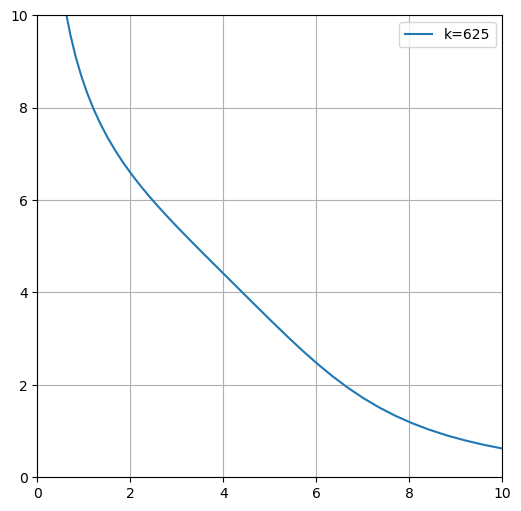

In [215]:
kk = 5**4
x_v = np.linspace(0, m.sqrt(10), 50)
x_v = [xx**2 for xx in x_v]
x_v[0] = x_v[1]/2
plt.grid(True)
plt.plot(x_v, [y_f(xx, kk) for xx in x_v], marker=None, linestyle='-', label=f"k={kk}")
inv_dct = {xx: invariant_eq(x=xx, y=swap_eq(xx, kk), k=kk) for xx in x_v}
plt.legend()
plt.xlim(0, max(x_v))
plt.ylim(0, max(x_v))
plt.show()

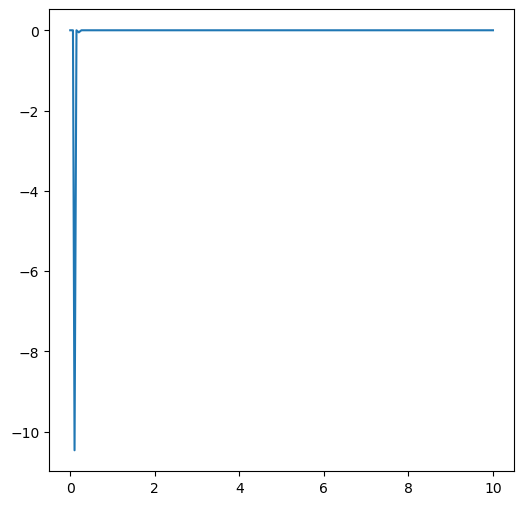

In [216]:
plt.plot(inv_dct.keys(), inv_dct.values())

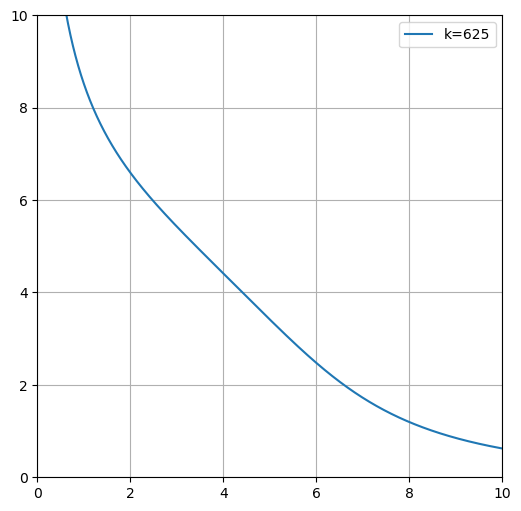

In [232]:
kk = 5**4
x_v = np.linspace(0, m.sqrt(10), 5000)
x_v = [xx**2 for xx in x_v]
x_v[0] = x_v[1]/2
plt.grid(True)
plt.plot(x_v, [y_f(xx, kk) for xx in x_v], marker=None, linestyle='-', label=f"k={kk}")
inv_dct = {xx: invariant_eq(x=xx, y=swap_eq(xx, kk), k=kk) for xx in x_v[:700]}
plt.legend()
plt.xlim(0, max(x_v))
plt.ylim(0, max(x_v))
plt.show()

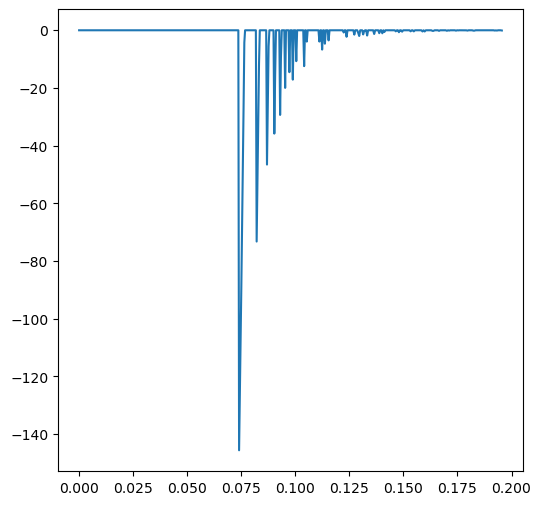

In [233]:
plt.plot(inv_dct.keys(), inv_dct.values())

In [234]:
{k:v for k,v in inv_dct.items() if abs(v) > 1e-3}

{0.07398959287756732: -145.58558313552436,
 0.07433413067890633: -127.43236508731712,
 0.07467946880034138: -108.63624577090434,
 0.07502560724187247: -89.17602444913302,
 0.07537254600349957: -69.0298527136531,
 0.07572028508522269: -48.17521626357643,
 0.07606882448704184: -26.58891621533121,
 0.07641816420895702: -4.24704993275941,
 0.08211644329265935: -73.23132995199842,
 0.08247938845620695: -53.416806326229334,
 0.08284313393985059: -32.93668633320647,
 0.08320767974359024: -11.770148731654785,
 0.08689715538626828: -46.54548799203599,
 0.08727050471106426: -26.36151244184225,
 0.08764465435595623: -5.518708483286787,
 0.09028611083288872: -35.812447238487835,
 0.09066666303854892: -15.649666938382325,
 0.09296678299452651: -29.34003981377691,
 0.09335293744085886: -9.256425762276876,
 0.09529571447396101: -19.963322782138107,
 0.09725849950946382: -14.524176939954032,
 0.09884313329959452: -17.105752905457848,
 0.10044057221126164: -10.705106578903383,
 0.10408162848813014: -12

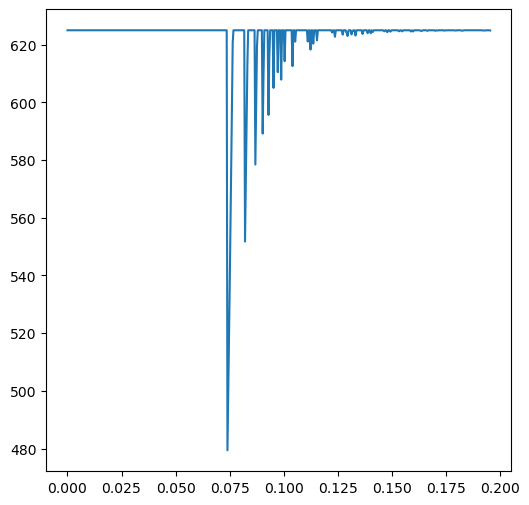

In [237]:
plt.plot(x_v[:700], [invariant_eq(x=xx, y=swap_eq(xx, kk), k=0) for xx in x_v[:700]])

### Numerical considerations
#### Comparing L1 with L2

L1 and L2 are different expressions of the L term above. L2 is the naive formula, L1 is optimized. L2 can be zero for very small values (and it is not even continous; see 0.009 and 0.01 below) whilst L1 is *always* greater than zero.

In [221]:
xs_v = [0.0001, 0.001, 0.009, 0.01, 0.015, 0.02, 0.05]
[(L1(xx,1), L2(xx, 1)) for xx in xs_v]

[(0, 1.0000000000000003e-28),
 (0, 1.0000000000000001e-21),
 (2.27373675443232e-13, 4.7829689999999975e-15),
 (0, 1.0000000000000002e-14),
 (2.27373675443232e-13, 1.9984014443252818e-13),
 (1.25055521493778e-12, 1.279999999999999e-12),
 (7.81199105404085e-10, 7.812499999988699e-10)]

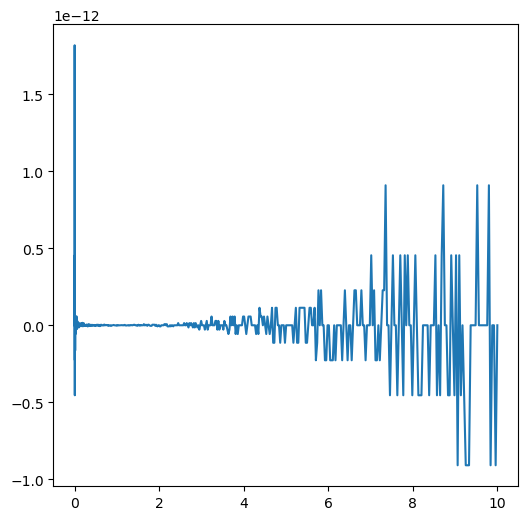

In [222]:
plt.plot(x_v, [L2(xx, 1) - L1(xx, 1) for xx in x_v])

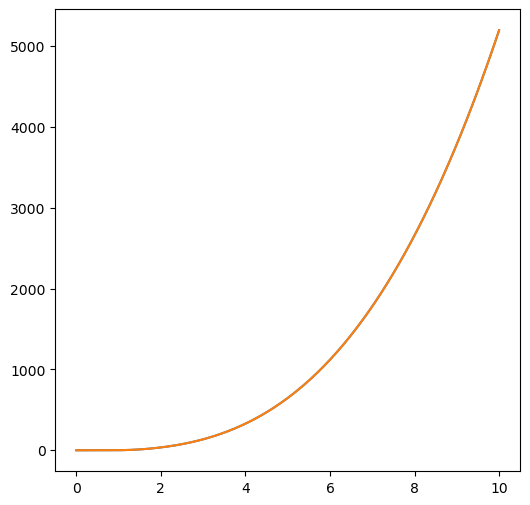

In [223]:
plt.plot(x_v, [L1(xx, 1) for xx in x_v])
plt.plot(x_v, [L2(xx, 1) for xx in x_v])
plt.show()